In [1]:
library(lavaan)
library(dplyr)
library(corrplot)
library(semPlot)

This is lavaan 0.6-5

lavaan is BETA software! Please report any bugs.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.84 loaded

Registered S3 methods overwritten by 'huge':
  method    from   
  plot.sim  BDgraph
  print.sim BDgraph



In [2]:
df = read.table('nut_dataframe.csv', sep=',', header=TRUE, na.strings="NA")
df <- df[complete.cases(df),]
head(df)

X,Germ,GBegF,BegFEndF,EndFBegM,BegMEndM,Height,Hlp,NoPodsWeight,PodsWeight,⋯,AscoRes,StemBr,StemL1ord,StemBr1ord,StemBr2ord,PodD,PodS,PodShape,SeedShape,SeedCol
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,-2.12899,-0.9808181,0.2691854,-0.1585673,-1.0883455,0.7900028,0.5494152,0.7037179,0.7337723,⋯,3,2,1,1,0,0,0,1,0,1
1,-2.12899,-0.6495050,0.2691854,-0.1585673,-1.7436236,0.6776419,-0.5445412,0.7527438,0.8547601,⋯,2,2,1,1,0,0,1,1,0,1
2,-2.12899,-0.6495050,0.2691854,-0.9909240,0.8774887,0.4529201,-0.5445412,0.3609298,0.4388255,⋯,2,2,1,1,0,0,1,1,0,1
3,-2.12899,0.6757476,-0.5464464,-0.4003575,-0.4330675,0.6776419,0.9869978,0.7633832,0.1432029,⋯,3,1,1,1,0,0,1,1,0,1
4,-2.12899,-1.3121313,0.4461669,-0.4003575,-1.0883455,-0.3336062,0.5494152,-0.8607554,-0.1032154,⋯,1,3,0,1,1,0,1,1,0,1
5,-2.12899,-0.9808181,0.6145117,-0.9909240,1.5327668,0.1158374,-0.5445412,-0.2002730,0.7816652,⋯,1,3,1,1,1,1,1,1,0,2


In [3]:
df.vars <- df[, c("PodWidth", "PodLength", "SeedsWeight", "SeedsNumber", 
                  "PodsNumber", "PodsWeight", "BegFEndF", "EndFBegM")]

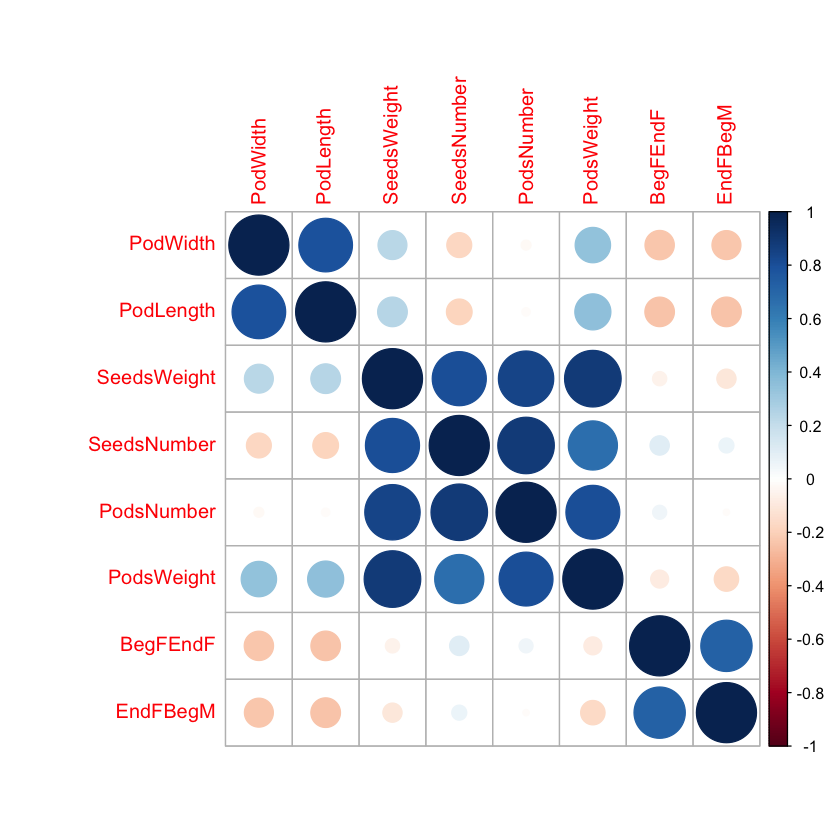

In [4]:
corrplot(cor(df.vars))

In [5]:
model <- 'sizes   =~ PodWidth + PodLength
          periods =~ BegFEndF + EndFBegM
          common  =~ SeedsWeight + SeedsNumber + PodsWeight + PodsNumber'

In [6]:
fit.sem <- sem(model, data = df)
summary(fit.sem, standardized = TRUE)

lavaan 0.6-5 ended normally after 37 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         19
                                                      
  Number of observations                           404
                                                      
Model Test User Model:
                                                      
  Test statistic                               593.726
  Degrees of freedom                                17
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard errors                             Standard

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  sizes =~                                                              
    PodWidth          1.0

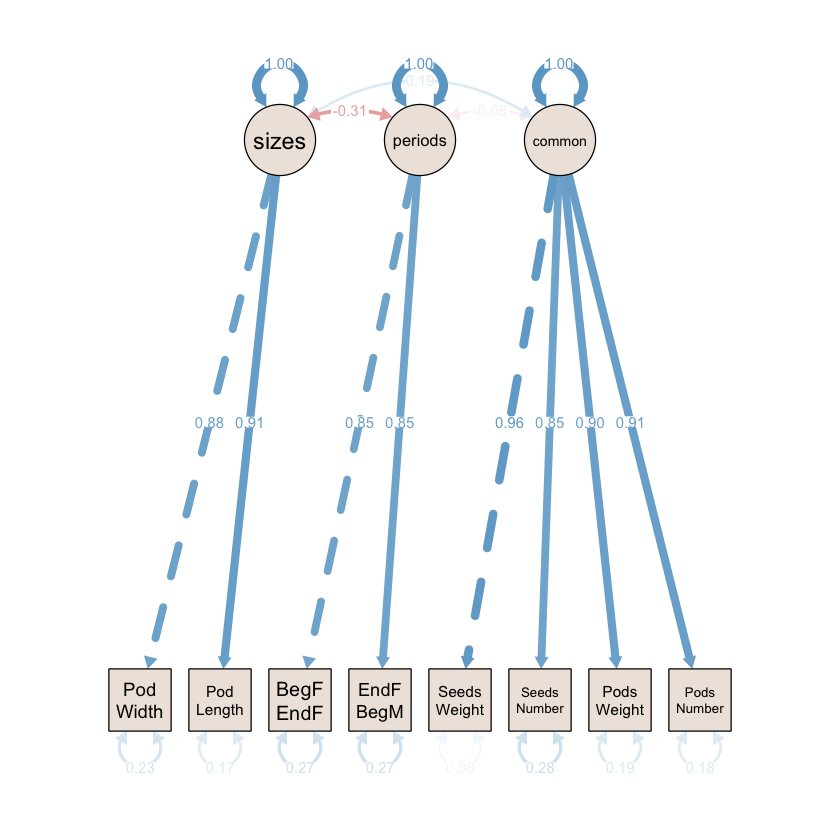

In [7]:
labels <- c("Pod\nWidth", "Pod\nLength", "BegF\nEndF", "EndF\nBegM",
            "Seeds\nWeight", "Seeds\nNumber", "Pods\nWeight", "Pods\nNumber",
            "sizes", "periods", "common")

semPaths(fit.sem, what="std", color = c("seashell2"), 
         posCol = c("skyblue3"), nodeLabels = labels, 
         sizeMan = 7, edge.label.cex = 0.75)